<a href="https://colab.research.google.com/github/SiriBatchu/Data_Science_Clustering/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency


In [2]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [3]:

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [8]:
import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency
data = pd.read_csv('/content/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [10]:
import pandas as pd

data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Infer the frequency of the data
inferred_freq = pd.infer_freq(data.index)
print(f"Inferred frequency: {inferred_freq}")

# If the inferred frequency is different from 'D', you can re-assign it:
if inferred_freq != 'D':
    data = data.asfreq(inferred_freq)

Inferred frequency: D


In [11]:

import datetime
idx = pd.IndexSlice

In [14]:
import pandas as pd

data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Use .loc with a list of columns to avoid chained indexing
# and ensure the date is in the correct format
data.loc[pd.to_datetime("1998-12-1"), ['Total']] = 10000

In [17]:


from datetime import datetime

start_date = datetime(1996, 1, 1)
end_date = datetime(2000, 1, 1)

import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Slice the DataFrame using .loc and the start and end dates
filtered_data = data.loc[start_date:end_date]
print(filtered_data)

Empty DataFrame
Columns: [value]
Index: []


In [19]:
import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency



In [23]:
import pandas as pd

# Try using the previous path that worked:
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
# If the above fails, check for typos in the filepath.
# If the file was moved, use the updated path.

data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency
data.iloc[0]

,2020-01-01
value,0.248357


In [26]:
import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency



Column 'Total' not found. Plotting 'value' instead.


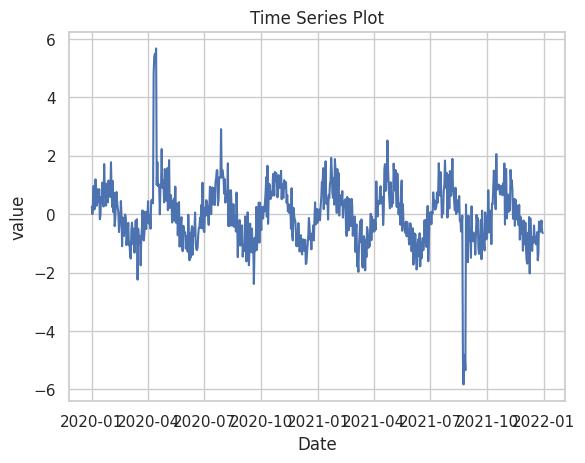

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load data and set index
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Correct start and end dates to be within the dataset's range
start_date = data.index.min()  # Use the earliest date in the dataset
end_date = data.index.max()  # Use the latest date in the dataset

# Filter data using the corrected dates
filtered_data = data.loc[start_date:end_date]

# Check if 'Total' column exists, otherwise use actual column name
if 'Total' in filtered_data.columns:
    column_to_plot = 'Total'
else:
    column_to_plot = filtered_data.columns[0] # Assume first column if 'Total' not found
    print(f"Column 'Total' not found. Plotting '{column_to_plot}' instead.")

# Plot data
plt.plot(filtered_data.index, filtered_data[column_to_plot])
plt.xlabel("Date")
plt.ylabel(column_to_plot)  # Use the actual column name for y-axis
plt.title("Time Series Plot")
plt.show()

##Seasonal Decompose



In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ... (your existing code to load and prepare data) ...

plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=15)

# Assuming 'filtered_data' is your DataFrame and you want to decompose the first column
column_to_decompose = filtered_data.columns[0]
result = seasonal_decompose(filtered_data[column_to_decompose], model='additive')

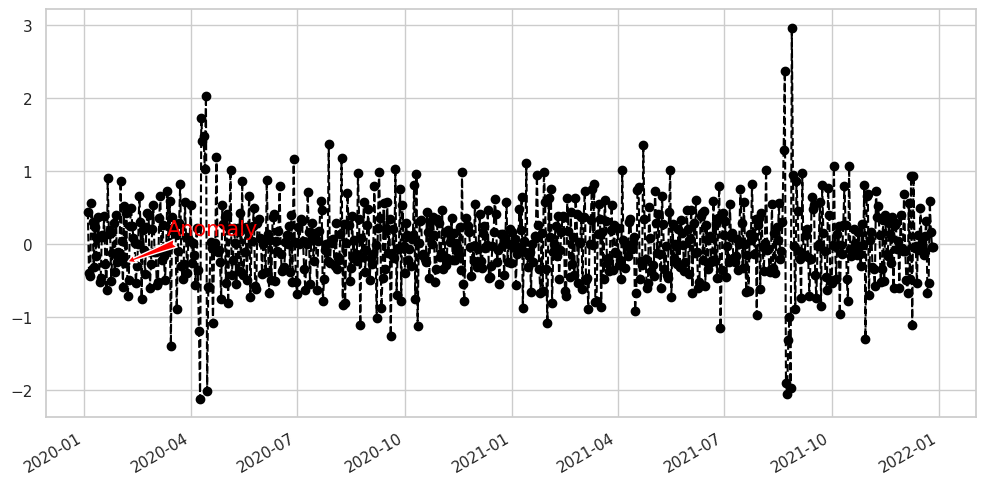

In [39]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20),
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

In [43]:
import pandas as pd

# Load data and set index
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Add new data points
data.loc["1993-03-01", 'Total'] = 30000  # Note: Use YYYY-MM-DD format
data.loc["2003-03-01", 'Total'] = 35000

# Now you can proceed with seasonal decomposition and plotting
# ... (rest of your code) ...

## Isolation Forest

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

<Axes: xlabel='date'>

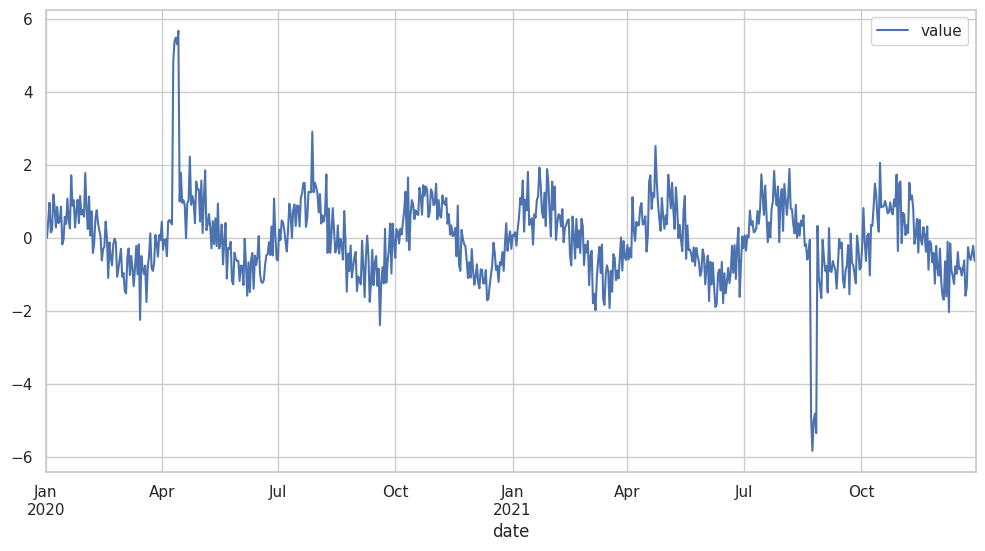

In [46]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
import pandas as pd
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency
data.plot()

In [47]:
outliers_fraction = float(.01)


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and prepare data
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Scale the data
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data.values.reshape(-1, 1))  # Scale 'Total' column

# Create a new DataFrame with scaled values
data_scaled = pd.DataFrame(np_scaled, index=data.index, columns=['Total_Scaled'])

# Now you can proceed with seasonal decomposition on the scaled data
# ... (rest of your code using data_scaled) ...

In [51]:

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Load and prepare data
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
data.set_index('date', inplace=True)
data = data.asfreq('D')  # Ensure daily frequency

# Scale the data
scaler = StandardScaler()

# **Check the actual column name in your CSV**
# **Replace 'value' with the actual column name if it's different**
data['Total_Scaled'] = scaler.fit_transform(data[['value']])  # Scale the correct column

outliers_fraction = float(.01)

# train isolation forest using the scaled data
model = IsolationForest(contamination=outliers_fraction)
model.fit(data[['Total_Scaled']])  # Fit the model with the scaled data

# Predict anomalies using the scaled data
data['anomaly'] = model.predict(data[['Total_Scaled']])



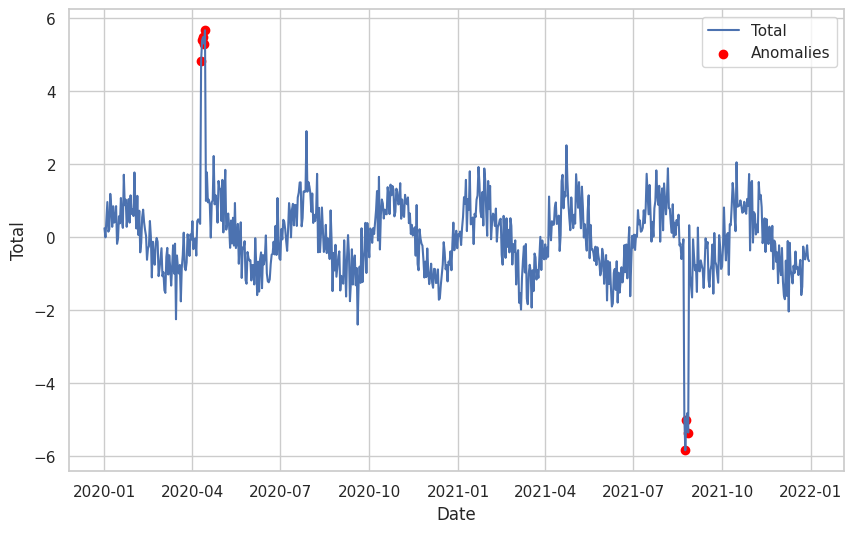

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your previous code to load, prepare, scale data and train the model) ...

# Predict anomalies using the scaled data
data['anomaly'] = model.predict(data[['Total_Scaled']])  # Predict using the scaled data

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# **Change 'Total' to 'value', which is the original data column**
anomalies = data.loc[data['anomaly'] == -1, 'value']  # Get original values for anomalies

# Plot the original data and highlight anomalies
# Change 'Total' to 'value' for plotting the original data
ax.plot(data.index, data['value'], label='Total')
ax.scatter(anomalies.index, anomalies, color='red', label='Anomalies')

ax.set_xlabel('Date')
ax.set_ylabel('Total')  # You can keep this label as 'Total'
ax.legend()
plt.show()

## Kmeans


In [60]:
from sklearn.cluster import KMeans


In [65]:
import pandas as pd

df = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
# Use df instead of data to set the index
df.set_index('date', inplace=True)
df = df.asfreq('D')  # Ensure daily frequency


In [68]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

df = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
df = df.asfreq('D')

data = df[['value']]
data = data.rename(columns={'value': 'Total'})

# Create the 'Total_Scaled' column using StandardScaler
scaler = StandardScaler()
data['Total_Scaled'] = scaler.fit_transform(data[['Total']]) # Actually scale the data and create the column

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data[['Total_Scaled']]) for i in n_cluster]  # Now this line should work
scores = [kmeans[i].score(data[['Total_Scaled']]) for i in range(len(kmeans))]

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pandas as pd  # Make sure pandas is imported

# Assuming df is your DataFrame with 'date' and 'value' columns

# Instead of including 'date' directly, extract numerical features from it
X = df[['value']].copy()  # Create a copy to avoid modifying the original df
X['dayofweek'] = X.index.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
# You can add other features like dayofyear, month, etc.
# X['dayofyear'] = X.index.dayofyear
# X['month'] = X.index.month

# Now X contains only numerical features
X = X.reset_index(drop=True)  # Reset index if needed

# Continue with the rest of the code
km = KMeans(n_clusters=10)
km.fit(X)
labels = km.labels_

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Assuming your original dataset file contains the required columns
df = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])
# ... (rest of your code to set index, frequency, etc.)

# Check the available columns in your DataFrame
print(df.columns)

# If the columns are not present, you might need to adjust this part
# based on the actual columns in your dataset
# For example, if you only have 'value' column, you can use:
data = df[['value']]
# And then rename it if needed
data = data.rename(columns={'value': 'price_usd'})  # Rename to 'price_usd' if necessary

# Or, if you have other relevant columns, select them accordingly
# data = df[['your_column1', 'your_column2', 'your_column3']]

# Once you have selected the correct columns, proceed with the rest of the code
X = data.values
X_std = StandardScaler().fit_transform(X)

Index(['date', 'value'], dtype='object')


In [76]:
data = df[['value']].copy()  # Create a copy to avoid modifying the original df
data = data.rename(columns={'value': 'price_usd'})

# If you have other relevant features in your original dataset, you can include them here
# For example, if you have 'srch_booking_window' and 'srch_saturday_night_bool'
# data = df[['value', 'srch_booking_window', 'srch_saturday_night_bool']].copy()
# data = data.rename(columns={'value': 'price_usd'})

# Continue with the rest of your code
X_std = StandardScaler().fit_transform(data[['price_usd']])  # Standardize only 'price_usd' for now
data = pd.DataFrame(X_std, columns=['price_usd'])

In [78]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
# Access the 'price_usd' column by name instead of numerical index
df['principal_feature1'] = data['price_usd']
# If you have other features, access them by their respective names
# df['principal_feature2'] = data['your_other_feature_name']
df['cluster'].value_counts()

,count
cluster,
6,126
8,123
0,116
2,113
1,102
9,65
7,45
5,30
3,5


In [79]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
df['anomaly1'] = (distance >= threshold).astype(int)

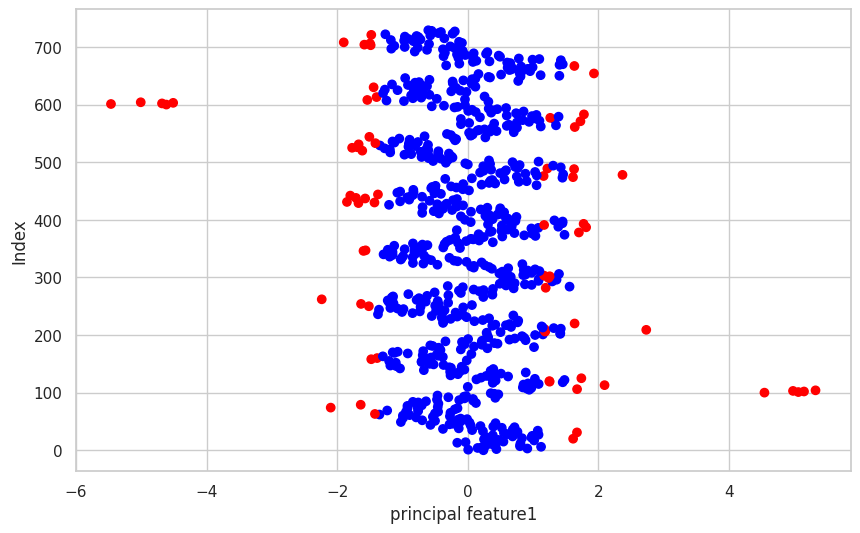

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
# Since 'principal_feature2' doesn't exist, we'll plot against the index for now.
# Replace 'df.index' with a suitable column if available.
ax.scatter(df['principal_feature1'], df.index, c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('Index') # Or the name of the column you choose to use
plt.show();

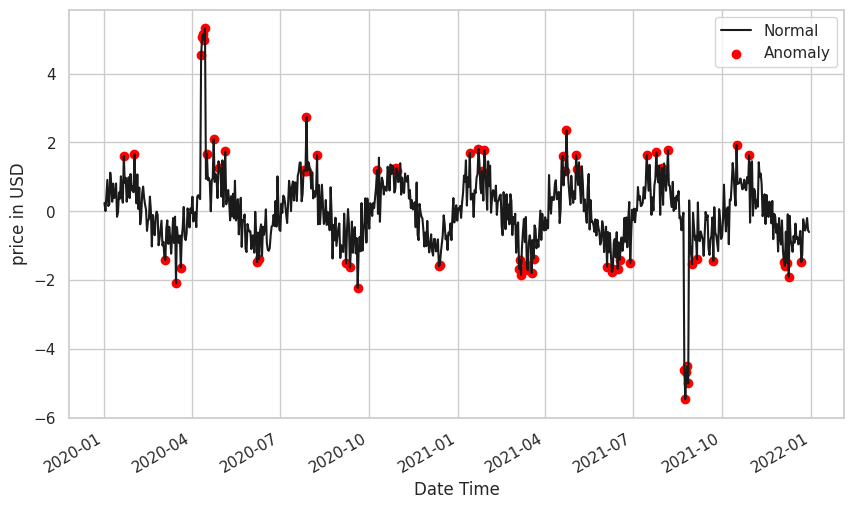

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ... (Your previous code for clustering and anomaly detection) ...

# Ensure 'price_usd' is in df
# This line was modified to copy 'price_usd' from 'data' to 'df'
df['price_usd'] = data['price_usd']

# Sort by date and convert to datetime
df = df.sort_values('date')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# ... (Rest of your plotting code) ...

fig, ax = plt.subplots(figsize=(10,6))

# Replace 'date_time' with 'date' and ensure 'price_usd' is the correct column name
a = df.loc[df['anomaly1'] == 1, ['date', 'price_usd']]  # anomaly

# Plot using 'date' instead of 'date_time'
ax.plot(df['date'], df['price_usd'], color='k', label='Normal')
ax.scatter(a['date'], a['price_usd'], color='red', label='Anomaly')
ax.xaxis_date()  # Format x-axis for dates
plt.xlabel('Date Time')
plt.ylabel('price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()

## Forecasting

In [87]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [88]:
from prophet import Prophet

In [94]:
import pandas as pd

t = pd.DataFrame()
t['ds'] = pd.to_datetime(pd.Series([]))
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])

# Assuming 'value' is the column you need, replace 'Total' with 'value':
data['value'].values  # Access the values of the 'value' column

# Continue with your Prophet model setup using the 'value' column
# For example:
# t['y'] = data['value']
# ... rest of your code ..

array([ 2.48357077e-01, -5.98806789e-04,  4.60588689e-01,  9.65827405e-01,
        1.53843097e-01,  2.19184656e-01,  1.18961171e+00,  8.45593876e-01,
        2.86838621e-01,  8.50102508e-01,  4.01638488e-01,  4.52029086e-01,
        8.54201118e-01, -1.78541975e-01, -4.31414922e-02,  5.75540221e-01,
        3.83606562e-01,  1.07629873e+00,  4.89993691e-01,  2.58245498e-01,
        1.71307842e+00,  8.78613082e-01,  1.03185015e+00,  2.87603414e-01,
        7.24975368e-01,  1.04512822e+00,  4.02016580e-01,  1.14861221e+00,
        6.39175849e-01,  7.67962478e-01,  5.82973156e-01,  1.77582661e+00,
        8.04804426e-01,  2.40746895e-01,  1.13530520e+00,  6.46366483e-02,
        7.27341642e-01, -4.12002985e-01, -1.54008859e-01,  5.48368279e-01,
        7.56908684e-01,  4.09274283e-01,  2.00159117e-01,  4.06113985e-02,
       -6.15816676e-01, -3.04777191e-01, -2.43733188e-01,  4.46651671e-01,
        2.17892291e-02, -1.09894502e+00, -1.21765578e-01, -5.41396761e-01,
       -7.50724239e-01, -

In [101]:
t
import altair as alt

In [102]:
import pandas as pd
from prophet import Prophet

# Load the data
data = pd.read_csv('/content/synthetic_anomaly_dataset.csv', parse_dates=['date'])

# Create the t DataFrame with 'ds' and 'y' columns
t = pd.DataFrame()
t['ds'] = data['date']  # Assign 'date' column from data to 'ds' in t
t['y'] = data['value']  # Assign 'value' column from data to 'y' in t

def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'additive',
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast

pred = fit_predict_model(t)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfd1rgbi/kc6z4zgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfd1rgbi/sfz9brve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38132', 'data', 'file=/tmp/tmpnfd1rgbi/kc6z4zgf.json', 'init=/tmp/tmpnfd1rgbi/sfz9brve.json', 'output', 'file=/tmp/tmpnfd1rgbi/prophet_modelxc2lxa8k/prophet_model-20241123222523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:25:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [103]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']

    return forecasted

pred = detect_anomalies(pred)

In [104]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)

plot_anomalies(pred)

alt.LayerChart(...)